In [60]:
# # # classify Reuters newswires into 46 mutually exclusive topics. # # #

In [61]:
# LOADING DATA
from keras.datasets import reuters
(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)


In [62]:
print(len(train_data))
len(test_data)

8982


2246

In [63]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [64]:
train_labels[10]

3

In [65]:
# VECTORIZE THE DATA

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [66]:
# VECTORIZE LABELS USING ONE HOT ENCODING

# def to_one_hot(labels, dimension=46):
#   results = np.zeros((len(labels), dimension))
#   for i, label in enumerate(labels):
#     results[i, label] = 1.
#   return results
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [67]:
# BUILDING THE MODEL
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))




In [68]:
# COMPILING THE MODEL
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [69]:
# SETTING ASIDE THE VALIDATION SET
x_val = x_train[1000:]
partial_x_train = x_train[:1000]

y_val = one_hot_train_labels[1000:]
partial_y_train = one_hot_train_labels[:1000]

In [70]:
# FITTING THE MODEL

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/20
2/2 [==============================] - 1s 426ms/step - loss: 3.6916 - accuracy: 0.2540 - val_loss: 3.3442 - val_accuracy: 0.5079
Epoch 2/20
2/2 [==============================] - 0s 166ms/step - loss: 3.1025 - accuracy: 0.5470 - val_loss: 2.9046 - val_accuracy: 0.5272
Epoch 3/20
2/2 [==============================] - 0s 163ms/step - loss: 2.5636 - accuracy: 0.5580 - val_loss: 2.5654 - val_accuracy: 0.5248
Epoch 4/20
2/2 [==============================] - 0s 159ms/step - loss: 2.1136 - accuracy: 0.6100 - val_loss: 2.2839 - val_accuracy: 0.5421
Epoch 5/20
2/2 [==============================] - 0s 166ms/step - loss: 1.7555 - accuracy: 0.6670 - val_loss: 2.0864 - val_accuracy: 0.5588
Epoch 6/20
2/2 [==============================] - 0s 162ms/step - loss: 1.4786 - accuracy: 0.7260 - val_loss: 1.9196 - val_accuracy: 0.6029
Epoch 7/20
2/2 [==============================] - 0s 159ms/step - loss: 1.2578 - accuracy: 0.7810 - val_loss: 1.8147 - val_accuracy: 0.6158
Epoch 8/20
2/2 [====

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

range(1, 21)


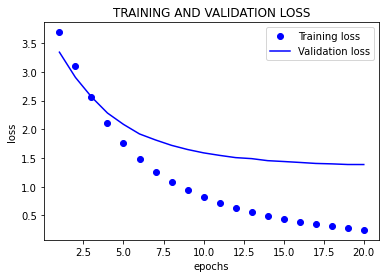

In [72]:
# PLOTTING LOSS  OF TRAINING ND VALIDATION 
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(train_loss)+1)
print(epochs)
plt.plot(epochs, train_loss, 'bo', label = 'Training loss' )
# plt.yticks(np.arange(0,7, 0.5))
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('TRAINING AND VALIDATION LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

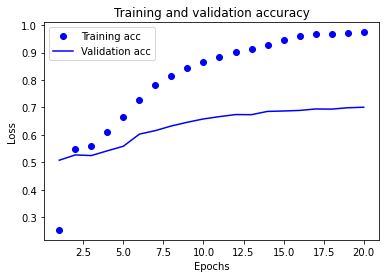

In [73]:
# PLOTTING ACCURACY OF TRAINING AND VALIDTION SET
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
#RECREATING THE MODEL FROM SCRATCH
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, batch_size=512, epochs= 18, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/18
2/2 [==============================] - 1s 376ms/step - loss: 3.7427 - accuracy: 0.2200 - val_loss: 3.2569 - val_accuracy: 0.5106
Epoch 2/18
2/2 [==============================] - 1s 269ms/step - loss: 2.9345 - accuracy: 0.5480 - val_loss: 2.4135 - val_accuracy: 0.5293
Epoch 3/18
2/2 [==============================] - 1s 261ms/step - loss: 2.0417 - accuracy: 0.5780 - val_loss: 2.1110 - val_accuracy: 0.5768
Epoch 4/18
2/2 [==============================] - 1s 262ms/step - loss: 1.5942 - accuracy: 0.6620 - val_loss: 2.0266 - val_accuracy: 0.5084
Epoch 5/18
2/2 [==============================] - 1s 259ms/step - loss: 1.3672 - accuracy: 0.6610 - val_loss: 1.6897 - val_accuracy: 0.6149
Epoch 6/18
2/2 [==============================] - 1s 257ms/step - loss: 1.0248 - accuracy: 0.7660 - val_loss: 1.5604 - val_accuracy: 0.6589
Epoch 7/18
2/2 [==============================] - 1s 264ms/step - loss: 0.8223 - accuracy: 0.8210 - val_loss: 1.4873 - val_accuracy: 0.6823
Epoch 8/18
2/2 [====

[1.3822723627090454, 0.7248441576957703]